# Regression (การถดถอย)

Regression แปลไทยได้ว่า "การถดถอย" ตีความหมายคือการลดลง แต่จริง ๆ แล้ว มันสามารถประมาณการในลักษณะที่เพิ่มขึ้นได้ด้วย

Regression เป็นการศึกษาความสัมพันธ์ของตัวแปร 2 ตัวขึ้นไป ซึ่งมีทั้งลักษณะความสัมพันธ์ที่เพิ่มขึ้น หรือ ลดลง

Regression มี 2 ประเภท
- Simple Regression หรือ Regression อย่างง่าย 2 ตัวแปร 2 ตัว ซึ่งความสัมพันธ์ทั้งสองตัวแปรอาจเป็นเส้นตรงหรือเป็นเส้นโค้งก็ได้
- Multiple Regression หรือ Regression เชิงพหุ ประกอบด้วยตัวแปรมากกว่า 2 ตัว

In [5]:
#ประเมิน Model อย่างง่าย ๆ ด้วย scikit-learn 
#ใช้ข้อมูลง่าย ๆ เพื่อสมมติ

y = [100, 50, 30, 20]         # y จากข้อมูลจริง
y_predict = [90, 50, 50, 30]  # y สมมติว่าได้จากการทำนายด้วย model

#ระยะคลาดเคลื่อน คือ 10 0 20 10 ตามลำดับ
#|(100-90)|, |(50-50|, |(30-50)|, |(20-30)| 

#คำนวณ MAE ด้วยมือ
#N (ข้อมูลทั้งหมด) = 4

#(10+0+20+10) / 4   = 10 

In [7]:
#หาด้วย scikit-learn ดังนี้


from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(y, y_predict)

10.0

In [9]:
#หา MSE ด้วย scikit-learn ดังนี้
mean_squared_error(y, y_predict)

150.0

In [10]:
#หาค่า RMSE ด้วย scikit-learn ดังนี้
import numpy as np

np.sqrt(mean_squared_error(y, y_predict))

12.24744871391589

In [11]:
#ประเมิน Model ด้วยไลบรารี
#Workshop นี้ ทำต่อจาก Workshop 2 บทที่ 13

#สร้าง model ก่อน

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression 

x_data = [1.0, 1.8, 3.0, 4.1, 5.2, 6.0]
y_data = [1, 1.3, 2.2, 2.5, 2.8, 3.6]

x = np.array(x_data)
y = np.array(y_data)

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [13]:
#หา R^2 score

#ทำได้ 2วิธี

#ใช้ .score() โดยพารามิเตอร์คือ x และ y
model.score(x, y)

0.9685718887231725

In [14]:
#ใช้ r2_score() โดยพารามิเตอร์คือ y(ข้อมูลจริง) และ y_predict(ที่ได้จากการคำนวณทำนายด้วย Model)
y_predict = model.predict(x)
r2_score(y, y_predict)

0.9685718887231725

In [15]:
#ความหมายคือ Model มีความแม่นยำถูกต้องประมาณ 97% 
#หรือพูดง่าย ๆ ถ้านำ Model ไปทำนาย จะมีความถูกต้องประมาณ 97%

In [17]:
#MSE 
#ใช้ mean_square_error() โดยพารามิเตอร์คือ y(ข้อมูลจริง) y_predict(ที่ได้จากการคำนวณทำนายด้วย Model)
mean_squared_error(y, y_predict)

#ค่าที่ได้ประมาณ 0.024 (เข้าใกล้ 0) ถือว่ามีความคลาดเคลื่อนน้อย

0.02437424630136185

In [18]:
#MAE
#ใช้ mean_absolute_error() โดยพารามิเตอร์คือ y(ข้อมูลจริง) y_predict(ที่ได้จากการคำนวณทำนายด้วย Model)
mean_absolute_error(y, y_predict)

#ค่าที่ได้ประมาณ 0.124 (เข้าใกล้ 0) ถือว่ามีความคลาดเคลื่อนน้อย

0.12421541810053253

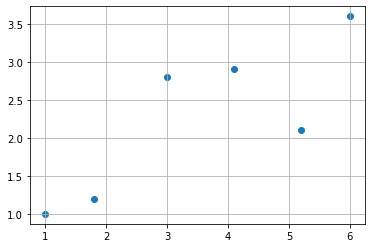

In [19]:
#เปรียบเทียบประสิทธิภาพระหว่าง 2 Model
#สร้างข้อมูล และพล็อตจุดดู คสพ.

x_data = [1.0, 1.8, 3.0, 4.1, 5.2, 6.0]
y_data = [1, 1.2, 2.8, 2.9, 2.1, 3.6]

x = np.array(x_data).reshape(-1, 1)
y = np.array(y_data).reshape(-1, 1)

plt.scatter(x, y)
plt.grid()
plt.show()

In [20]:
#สร้างโมเดล
model.fit(x, y)

LinearRegression()

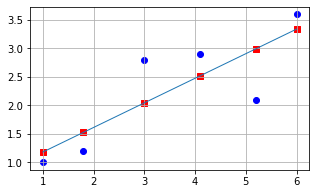

In [21]:
y_predict = model.predict(x)

plt.rcParams['figure.figsize'] = 5,3 
plt.grid()
plt.scatter(x, y, color='b')  
plt.plot(x, y_predict, linewidth='1')              #จุดข้อมูลจริง 
plt.scatter(x, y_predict, color='r', marker='s')   #กราฟที่ได้จากการทำนาย (Prediction)

plt.show()

In [22]:
#ประเมินโมเดล

model.score(x, y)

0.6708607578004822

In [23]:
mean_squared_error(y, y_predict)

0.2870825612518016

In [24]:
mean_absolute_error(y, y_predict)

0.4668725550751493

In [30]:
#สรุปผลการประเมินประสิทธิภาพ Model ทั้ง 2 ชุด

import pandas as pd

cols = ['ข้อมูล', 'R^2 score', 'MSE', 'MAE']
datas = [['ข้อมูลชุดแรก', 0.9685, 0.0243, 0.1242],
        ['ข้อมูลชุดใหม่', 0.6708, 0.2870, 0.4668]]
df = pd.DataFrame(datas, columns=cols)

In [29]:
df.set_index(['ข้อมูล'], inplace=True)
df

,R^2 score,MSE,MAE
ข้อมูล,,,
ข้อมูลชุดแรก,0.9685,0.0243,0.1242
ข้อมูลชุดใหม่,0.6708,0.2870,0.4668


In [31]:
#ลองพยากรณ์ผลโฆษณา TV 
#(ลงทุนโฆษณาเท่าไร จะเพิ่มยอดขายเท่าไร)

#เริ่มอ่านข้อมูล
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/advertising.csv', usecols=['TV', 'Sales'])
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [32]:
#มูลค่าการลงทุนโฆษณาTV (*1000) และ Sales แสดงจำนวนที่ขายได้ (*1000)
#เช่น ลงทุนโฆษณา 230,100 จะช่วยให้ขายสินค้าได้ประมาณ 22,100 ชิ้น

#คำถามคือ
#มีคสพ. ระหว่างการลงทุนโฆษณา กับจำนวนสินค้าที่ขายได้หรือไม่ (ลงโฆษณาแล้วส่งเสริมการขายหรือไม่)
#ทำนายยอดขายเมื่อลงทุนโฆษณา มูลค่า 300 500 1000 (หน่วย *1000)

In [33]:
df.shape

(200, 2)

In [34]:
df.isnull().sum()     #ตรวจ Missing data

TV       0
Sales    0
dtype: int64

In [36]:
#เตรียมตัวแปรไว้ Train Model

x = df.TV.values.reshape(-1, 1)
y = df.Sales.values.reshape(-1, 1)
x[:5]   #ดู 5 ข้อมูลแรก

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8]])

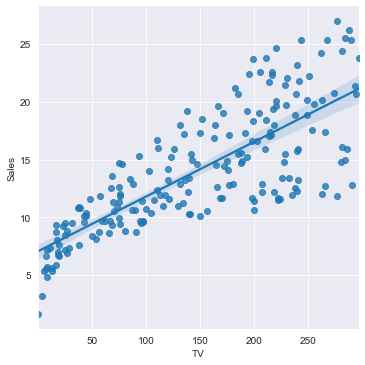

In [38]:
#พล็อตดูข้อมูล
sns.set_style('darkgrid')
sns.lmplot(x='TV', y='Sales', data=df)

In [40]:
#มีแนวโน้มค่อนข้างเป็นเส้นตรง ดังนั้นวิเคราะห์โดยใช้ Linear Regression ต่อ

#สร้าง Model และ Train ด้วย .fit()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error 

model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [60]:
model.coef_, model.intercept_

#coef_ หรือ slope = 0.0475 หมายถึง ถ้าลงทุนโฆษณาเพิ่ม 1 หน่วย (อย่าลืมว่าคำนวณจริงต้อง *1000) จะส่งเสริมการขายสินค้าเพิ่มขึ้น .0475 หน่วย
#intercept = 7.0326 ความหมายคือ แม้ไม่ลงทุนโฆษณาเลย (x=0) ก็ขายสินค้าได้ 7.0326 หน่วย

(array([[0.04753664]]), array([7.03259355]))

In [56]:
model.score(x, y)

0.9999976549987364

In [57]:
y_predict = model.predict(x)
mean_squared_error(y, y_predict)

3.8804030743001e-05

In [58]:
mean_absolute_error(y, y_predict)

0.005381250000001003

In [59]:
#ทำนายว่า ถ้าลงทุนโฆษณา 300 500 1000 (หน่วย*1000) จะส่งเสริมการขายเท่าไร

x_input = [[300],
          [500],
          [1000]]

y_predict = model.predict(x_input)
y_predict

array([[21.29358568],
       [30.80091377],
       [54.56923398]])

In [61]:
#การลงทุนดังกล่าว ส่งเสริมการขายเพิ่มขึ้นประมาณ 21 30 และ 54 (*1000) ชิ้น ตามลำดับ

In [62]:
#Multiple Linear Regression

#มีหลายตัวแปรที่ต้องพิจารณาพร้อม ๆ กัน เลยต้องใช้ MLR ตามสมการนี้

#y = (m1*x1) + (m2 * x2) + (mn * xn) + b

#สมมติว่าการลงทุนโฆษณาทั้งหมดมีสื่อ TV Radio Newspaper ดังนั้น สมการจะเป็นดังนี้
#y = (mTV * xTV)+ (mRadio * xRadio) + (mNewspaper * xNewspaper) + b

In [63]:
#ทดสอบ MLR

df = pd.read_csv('data/advertising.csv', index_col=0)
df.head()

#การได้มาของยอดขาย มีการลงทุนโฆษณาในสื่อหลายประเภท ต้องพิจารณาพร้อมกัน ไม่ใช่หยิบสื่อใดสื่อหนึ่งมาอย่างเดียว

#คำถามคือ
#มี คสพ. ระหว่างการลงทุนโฆษณากับจำนวนสินค้าที่ขายได้หรือไม่
#คสพ.ยอดขาย กับโฆษณาแต่ละสื่อเป็นอย่างไร สื่อใดดี-ไม่ดี
#ทำนายยอดขายเมื่อลงทุนโฆษณามูลค่าต่างกัน

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


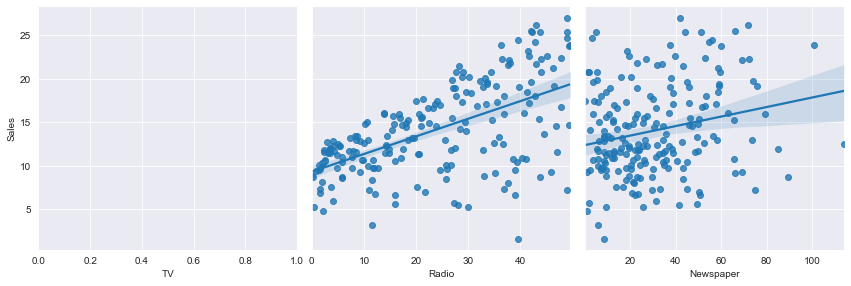

In [71]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, kind='reg')

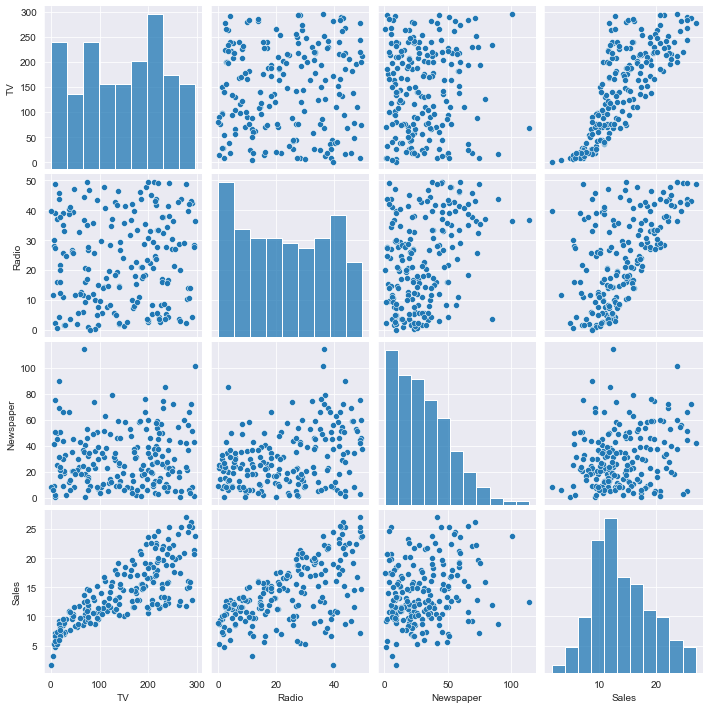

In [70]:
g = sns.pairplot(df)

In [72]:
#สร้าง Model และ Train ด้วย .fit()

feature_cols = ['TV', 'Radio', 'Newspaper']
X = df[feature_cols]     #ค่า matrix นิยมใช้ตัวพิมพ์ใหญ่ (แต่ใช้ตัวเล็กก็ได้นะ)
y = df.Sales

model = LinearRegression()
model.fit(X, y)
print(model.coef_)
print(model.intercept_)

[ 0.04576465  0.18853002 -0.00103749]
2.9388893694594067


In [73]:
list(zip(feature_cols, model.coef_))    #รวมข้อมูลเป็น List เดียวกัน

[('TV', 0.04576464545539761),
 ('Radio', 0.18853001691820462),
 ('Newspaper', -0.0010374930424762972)]

In [74]:
#ค่าสมการ
#Y = (.0458 * TV) + (.1885 * Radio) + (-.001 * Newspaper) + 2.939

#ความหมาย ลงทุน TV เพิ่ม 1 หน่วย ได้ยอดขายเพิ่มขึ้น 0.0458 (0.046)
#ลงทุน Radio เพิ่ม 1 หน่วย ได้ยอดขายเพิ่มขึ้น 0.1885 (0.189) 
#ลงทุน Radio คุ้มสุด ส่วน Newspaper แทบไม่ค่อยมีผลอะไรเลย (ค่าเข้าใกล้ศูนย์ ติดลบ)

In [75]:
#R^2 score
model.score(X, y)   

#0.897 ความแม่นยำประมาณ 89%

0.8972106381789522

In [76]:
#ทำนายว่า ต้องการลงทุนทั้งสามสื่อดังตาราง จะส่งเสริมยอดขายเท่าไร 
#ทำเป็น List ตามลำดับโครงสร้างข้อมูล ['TV', 'Radio', 'Newspaper'] 

x_input = [[300,0,0], [0,300,0], [0,0,300], [100,200,200], [100,200,0]]
model.predict(x_input)    #เขียนเมทริกซ์แบบบรรทัดเดียว

array([16.66828301, 59.49789444,  2.62764146, 45.01385869, 45.2213573 ])

In [81]:
#ตารางสรุปผลลัพธ์

cols = ['NO', 'TV', 'Radio', 'Newspaper', 'Sales']
datas = [['Case1', 300, 0, 0, 16.67],
         ['Case2',0,300,0,59.50],
         ['Case3',0,0,300,2.63],
         ['Case4',100,200,200,45.01],
         ['Case5',100,200,0,45.22]] 

table = pd.DataFrame(datas, columns=cols)

In [80]:
table.set_index('NO')

,TV,Radio,Newspaper,Sales
NO,,,,
Case1,300,0,0,16.67
Case2,0,300,0,59.50
Case3,0,0,300,2.63
Case4,100,200,200,45.01
Case5,100,200,0,45.22


In [82]:
#ผลการวิเคราะห์ตอบคำถามได้ว่า
#การลงทุน Radio คุ้มสุด รองมาคือ TV ส่วน Newspaper ไม่คุ้ม
#สังเกต Case 4 ลงทุนรวม 500 ส่วน Case 5 300 ส่วน โดยตัดงบ Newspaper ปรากฏว่า ผลลัพธ์ที่ได้แทบไม่ต่างกัน

In [83]:
#Polynomial Regression

#คสพ.ระหว่างตัวแปรไม่ได้เป็นเส้นตรงเสมอไป อาจเป็นเส้นโค้งก็ได้ 
#ถ้า trend ของกลุ่มข้อมูลเป็นเส้นโค้ง แล้วเราใช้สมการเส้นตรง ผลการทำนายก็จะคลาดเคลื่อนไปมาก
#ดังนั้นจึงมีเทคนิค Polynomial สร้างสมการเส้นโค้งให้ใกล้เคียงกับแนวข้อมูล ทำให้การทำนายแม่นยำกว่า 

#y = (m1*x)+(m2*x^2)+(mn*x^n) + b
#หลักการคือ ในสมการ ค่า x จะมีค่ายกกำลังสูงกว่า 1 เพื่อให้เส้นสามารถโค้งได้
#การยกกำลังจะมีค่ามากกว่า 2 ก็ได้ ขึ้นอยู่กับว่า ต้องการให้โค้งกี่ครั้ง (แต่ถ้าเลขชี้กำลังมากไป อาจเกิดปัญหา overfitting)

In [84]:
#workshop ทำนายค่า GDP 
#ลองเปรียบเทียบการใช้ 2 วิธีวิเคราะห์

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/gdp4c.csv', index_col=0)
df.head()

,SGP,THA,USA,VNM
1960,704462302.4,2.760747e+09,5.433000e+11,NaN
1961,764308114.5,3.034044e+09,5.633000e+11,NaN
1962,825885273.7,3.308913e+09,6.051000e+11,NaN
1963,917222004.4,3.540403e+09,6.386000e+11,NaN
1964,893734483.2,3.889130e+09,6.858000e+11,NaN


In [85]:
df.isnull().sum()

SGP     0
THA     0
USA     0
VNM    25
dtype: int64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'GDP')

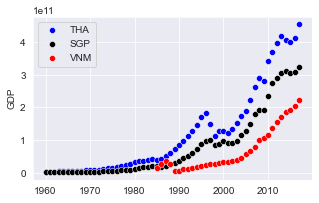

In [89]:
#พล็อตกราฟดูข้อมูล

sns.set_style('darkgrid')
sns.scatterplot(df.index, df.THA, label='THA', color='b')
sns.scatterplot(df.index, df.SGP, label='SGP', color='black')
sns.scatterplot(df.index, df.VNM, label='VNM', color='r')
plt.ylabel('GDP')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'GDP')

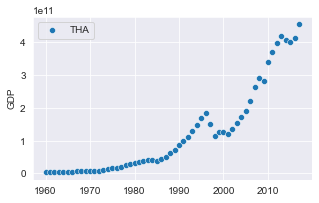

In [87]:
#ลองพล็อตเฉพาะไทย
sns.scatterplot(df.index, df.THA, label='THA')
plt.ylabel('GDP')

In [90]:
#เตรียมข้อมูลสำหรับการ Train
#ปี คศ. เป็น index การกำหนดค่า x จึงต้องกำหนดตามข้างล่างนี้
x = df.index.values.reshape(-1, 1)
y = df.THA

In [91]:
#ใช้ Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

LinearRegression()

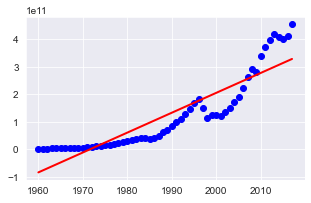

In [92]:
y_predict = model.predict(x)                     # y ที่ได้จากการทำนาย
plt.scatter(x, y, color='b')                     #x, y ข้อมูลจริง
plt.plot(x, y_predict, linewidth='2', color='r') #ได้จาก Prediction
plt.show()

In [93]:
#ประเมินความแม่นยำ

from sklearn.metrics import mean_squared_error, mean_absolute_error#, r2_score
import numpy as np
print('R2 = {:.5f} '.format(model.score(x, y)))
print('MSE = {:.4e} '.format(mean_squared_error(y, y_predict)))
print('RMSE = {:.4e} '.format(np.sqrt(mean_squared_error(y, y_predict))))

R2 = 0.81300 
MSE = 3.3677e+21 
RMSE = 5.8032e+10 


In [94]:
#ค่า R^2  ประมาณ 81%

In [98]:
#ทำนายปี 2020 จะมีค่า GDP เท่าไร

y_predict = model.predict([[2020]])
print('{:,.6E}'.format(y_predict[0]))

3.504274E+11


In [99]:
#ค่าที่ได้เมื่อเทียบกับกราฟแล้วไม่น่าจะถูกต้อง เนื่องจากปี 2017 ก็เกิน 4E+11 แล้ว แถมกราฟยังมีแนวโน้มเพิ่มสูงขึ้นเรื่อย ๆ ดังนั้นลองใช้ Polynomial

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)   #degree ยกกำลัง 2
x_poly = poly_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

LinearRegression()

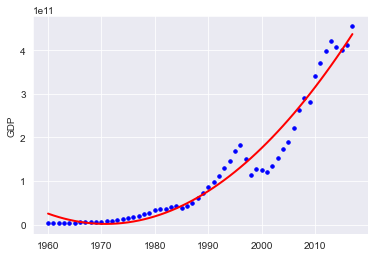

In [101]:
y_poly_pred = model.predict(x_poly)

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = 6,4  

plt.scatter(x, y, color='b',s=12) 
plt.plot(x, y_poly_pred, linewidth='2', color='r') 
plt.ylabel('GDP')

plt.show()

In [102]:
#ประเมิน Model 

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

print('R2 = {:.5f} '.format(model.score(x_poly, y)))
print('R2 = {:.5f} '.format(r2_score(y, y_poly_pred)))

print('MSE = {:.4e} '.format(mean_squared_error(y, y_poly_pred)))
print('RMSE = {:.4e} '.format(np.sqrt(mean_squared_error(y,  y_poly_pred))))

R2 = 0.95797 
R2 = 0.95797 
MSE = 7.5696e+20 
RMSE = 2.7513e+10 


In [103]:
#ลองเปลี่ยน degree = 3 

poly_features = PolynomialFeatures(degree=3)   #degree ยกกำลัง 3
x_poly = poly_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

LinearRegression()

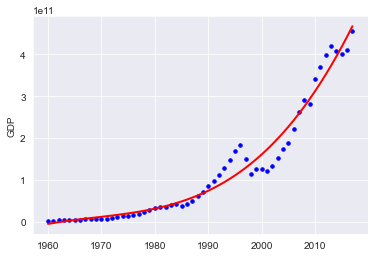

In [104]:
y_poly_pred = model.predict(x_poly)

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = 6,4  

plt.scatter(x, y, color='b',s=12) 
plt.plot(x, y_poly_pred, linewidth='2', color='r') 
plt.ylabel('GDP')

plt.show()

In [105]:
#ลองเปลี่ยน degree = 4

poly_features = PolynomialFeatures(degree=4)   #degree ยกกำลัง 4
x_poly = poly_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

LinearRegression()

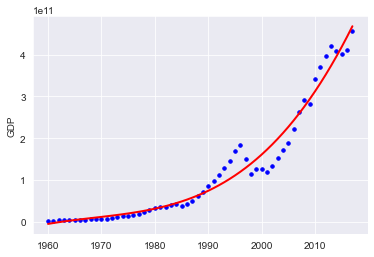

In [106]:
y_poly_pred = model.predict(x_poly)

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = 6,4  

plt.scatter(x, y, color='b',s=12) 
plt.plot(x, y_poly_pred, linewidth='2', color='r') 
plt.ylabel('GDP')

plt.show()

In [107]:
#จะเห็นว่า Degree = 3 เส้นโค้งของ Model เข้ากับจุดข้อมูลได้ดีกว่า

In [111]:
#ตารางสรุปผลลัพธ์ 

cols = ['Case', 'R2 Score', 'MSE', 'RMSE']
datas = [['Linear', 0.81300, 3.3677e+21, 5.8032e+10],
        ['degree=2', 0.95797, 7.5696e+20, 2.7513e+10],
        ['degree=3', 0.96689, 5.9633e+20, 24420e+10],
        ['degree=4', 0.96692, 5.9573e+20, 2.4408e+10]]

gtable = pd.DataFrame(datas, columns=cols)
gtable.set_index('Case')

,R2 Score,MSE,RMSE
Case,,,
Linear,0.81300,3.367700e+21,5.803200e+10
degree=2,0.95797,7.569600e+20,2.751300e+10
degree=3,0.96689,5.963300e+20,2.442000e+14
degree=4,0.96692,5.957300e+20,2.440800e+10


In [112]:
#เมื่อเพิ่ม degree ค่าความคลาดเคลื่อนจะลดลง แต่ถ้าเพิ่มมากไป ก็อาจจะทำให้ Model เกิดภาวะโค้งมากไป (overfitting) ซึ่งไม่เป็นผลดี

In [113]:
#ทำนาย GDP ปี 2015, 2018 และ 2020
x_input = [[2015], [2018], [2020]]
y_poly_pred = model.predict(poly_features.fit_transform(x_input))

for val in y_poly_pred:
    print("{:.4e}".format(val))

4.1852e+11
4.9380e+11
5.4910e+11


In [116]:
df.tail()

#ค่าที่ได้จาก Model กับ Dataset 
#พบว่าในปี 2015 ค่าแตกต่างกันประมาณ 2.8%         (4.1852e+11 ใน model, 4.4.013990e+11 ของจริง)
#แต่จะคลาดเคลื่อนน้อยกว่า Linear Regression

,SGP,THA,USA,VNM
2013,3.044540e+11,4.203330e+11,1.669150e+13,1.712220e+11
2014,3.115390e+11,4.073390e+11,1.742760e+13,1.862050e+11
2015,3.040980e+11,4.013990e+11,1.812070e+13,1.932410e+11
2016,3.097640e+11,4.117550e+11,1.862450e+13,2.052760e+11
2017,3.239070e+11,4.552210e+11,1.939060e+13,2.238640e+11


In [117]:
#ทำนายจำนวนผู้ติดเชื้อ COVID-19

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('data/covid19.csv')

df.tail()

,date,newcase,death
77,03/18/2020,35,0
78,03/19/2020,60,0
79,03/20/2020,50,0
80,03/21/2020,89,0
81,03/22/2020,188,0


In [118]:
df = df[(df.index >= 67)]  #ใช้ข้อมูลตั้งแต่วันที่ 67 เป็นต้นไป

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


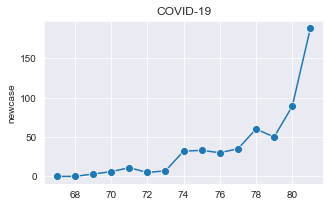

In [119]:
#ดูแนวโน้ม

plt.figure(figsize=(5,3))
sns.lineplot(df.index,'newcase', data=df, marker='o', markersize=8)
plt.title('COVID-19')
plt.show()

In [120]:
#เตรียมข้อมูล x(เลขวัน) และ y(จำนวนผู้ติดเชื้อ) เพื่อ Train และสร้าง Model

x = df.index.values.reshape(-1,1)
y = df.newcase
x[:5] , y[:5]   

(array([[67],
        [68],
        [69],
        [70],
        [71]], dtype=int64),
 67     0
 68     0
 69     3
 70     6
 71    11
 Name: newcase, dtype: int64)

In [121]:
#สร้าง Model

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3)
x_poly = poly_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)

LinearRegression()

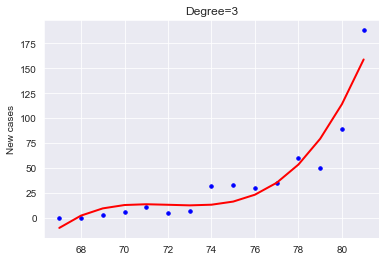

In [122]:
#พล็อตเส้นโค้งที่ได้จาก Model เทียบกับจุดข้อมูลจริง (จุดกลม)

y_poly_pred = model.predict(x_poly)

sns.set_style('darkgrid')

plt.scatter(x, y, color='b',s=12)  
plt.plot(x, y_poly_pred, linewidth='2', color='r') 
plt.ylabel('New cases')
plt.title('Degree=3')
plt.show()

In [123]:
#ประเมิน Model โดยคำนวณหาค่า R^2

from sklearn.metrics import  r2_score
print('R2 = {:.5f} '.format(r2_score(y, y_poly_pred)))

R2 = 0.90059 


In [124]:
#การอ้างอิงวัน ใช้ค่าแกน X (index ของแถว) 
#แกน X บอกเลขวันลำดับแรกเริ่มนับ 
#ต้องการพยากรณ์หรือทำนายว่า ณ วันลำดับที่ต่าง ๆ ดังต่อไปนี้ มีจำนวนผู้ติดเชื้อ(รายวัน) เท่าใด

#81: ลำดับวันที่บันทึกข้อมูลค่าสุดท้าย คือ 22/3/2020
#90: 10 วันถัดไป หลังจาก 22/3/2020
#110: 30 วันถัดไป หลังจาก 22/3/2020
#140: 60 วันถัดไป หลังจาก 22/3/2020

x_input = [[81], [90], [110], [140]]

In [125]:
#ทำนาย
y_poly_pred = model.predict(poly_features.fit_transform(x_input))
y_poly_pred

for val in y_poly_pred:
    print('{:.0f}'.format(val))

159
1226
11558
66365
